# House Prices
### 다양한 데이터를 이용한 집값 예측
### 평가 지표 : RMSE

# Data Load

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = pd.read_csv('/content/drive/MyDrive/DataSet/Aiffel/house_price/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DataSet/Aiffel/house_price/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/DataSet/Aiffel/house_price/sample_submission.csv')

In [3]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [4]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1,227,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Abnorml
2,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal


In [5]:
sub.head(3)

,Id,SalePrice
0,86,0
1,227,0
2,492,0


### Columns
#### 총 81개의 Column을 가지고 있음

</br>

##### MSSubClass: 건물 클래스
##### MSZoning: 일반적인 구역 분류
##### LotFrontage: 도로와 연결된 부지의 선형 길이(피트 단위)
##### LotArea: 부지 크기(평방 피트 단위)
##### Street: 도로 접근 방식 유형
##### Alley: 골목 접근 방식 유형
##### LotShape: 부지의 일반적인 형태
##### LandContour: 부지의 평탄도
##### Utilities: 제공되는 유틸리티 유형
##### LotConfig: 부지 구성
##### LandSlope: 부지의 경사도
##### Neighborhood: Ames 시 내의 물리적 위치
##### Condition1: 주요 도로 또는 철도와의 근접성
##### Condition2: 주요 도로 또는 철도와의 근접성 (두 번째가 있을 경우)
##### BldgType: 주거 형태
##### HouseStyle: 주택 스타일
##### OverallQual: 전반적인 자재 및 마감 품질
##### OverallCond: 전반적인 상태 등급
##### YearBuilt: 원래 건축 연도
##### YearRemodAdd: 리모델링 또는 추가 건축 연도
##### RoofStyle: 지붕 유형
##### RoofMatl: 지붕 자재
##### Exterior1st: 주택 외장 자재
##### Exterior2nd: 주택 외장 자재 (두 개 이상의 자재가 사용된 경우)
##### MasVnrType: 벽돌 장식 유형
##### MasVnrArea: 벽돌 장식 면적(평방 피트 단위)
##### ExterQual: 외장 자재 품질
##### ExterCond: 외장 자재의 현재 상태
##### Foundation: 기초 유형
##### BsmtQual: 지하실 높이
##### BsmtCond: 지하실의 일반적인 상태
##### BsmtExposure: 출입구가 있는 지하실 벽
##### BsmtFinType1: 지하실 첫 번째 마감 영역 품질
##### BsmtFinSF1: 첫 번째 마감된 지하실 면적(평방 피트 단위)
##### BsmtFinType2: 두 번째 마감된 지하실 품질 (있을 경우)
##### BsmtFinSF2: 두 번째 마감된 지하실 면적(평방 피트 단위)
##### BsmtUnfSF: 마감되지 않은 지하실 면적(평방 피트 단위)
##### TotalBsmtSF: 전체 지하실 면적(평방 피트 단위)
##### Heating: 난방 유형
##### HeatingQC: 난방 품질 및 상태
##### CentralAir: 중앙 공기 조화 여부
##### Electrical: 전기 시스템
##### 1stFlrSF: 첫 번째 층 면적(평방 피트 단위)
##### 2ndFlrSF: 두 번째 층 면적(평방 피트 단위)
##### LowQualFinSF: 저품질 마감된 면적 (모든 층)
##### GrLivArea: 지상 거주 면적(평방 피트 단위)
##### BsmtFullBath: 지하실 완전 욕실 개수
##### BsmtHalfBath: 지하실 반욕실 개수
##### FullBath: 1층 이상의 완전 욕실 개수
##### HalfBath: 1층 이상의 반욕실 개수
##### Bedroom: 침실 개수 (지하실 이상)
##### Kitchen: 주방 개수
##### KitchenQual: 주방 품질
##### TotRmsAbvGrd: 1층 이상의 총 방 개수 (욕실 제외)
##### Functional: 주택 기능성 평가
##### Fireplaces: 벽난로 개수
##### FireplaceQu: 벽난로 품질
##### GarageType: 차고 위치
##### GarageYrBlt: 차고 건축 연도
##### GarageFinish: 차고 내부 마감 상태
##### GarageCars: 차고 크기(차량 수용 가능 개수)
##### GarageArea: 차고 면적(평방 피트 단위)
##### GarageQual: 차고 품질
##### GarageCond: 차고 상태
##### PavedDrive: 포장된 차도 여부
##### WoodDeckSF: 나무 데크 면적(평방 피트 단위)
##### OpenPorchSF: 개방형 현관 면적(평방 피트 단위)
##### EnclosedPorch: 실내 현관 면적(평방 피트 단위)
##### 3SsnPorch: 3계절 현관 면적(평방 피트 단위)
##### ScreenPorch: 스크린 현관 면적(평방 피트 단위)
##### PoolArea: 수영장 면적(평방 피트 단위)
##### PoolQC: 수영장 품질
##### Fence: 울타리 품질
##### MiscFeature: 기타 특이한 특징
##### MiscVal: 기타 특이한 특징의 가치(달러 단위)
##### MoSold: 판매된 월
##### YrSold: 판매된 연도
##### SaleType: 판매 유형
##### SaleCondition: 판매 상태
##### **SalePrice : 주택 가격(Target)**

### 데이터 정보
##### train, test 다수의 같은 Column에서 결측치 발생 확인

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    251 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          21 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# Data Cleaning

## 결측치

#### 결측치 확인
##### 비율이 15% 이상의 결측치들에 대해서 노이즈 우려로 Drop
##### LotFrontage, Alley, MasVnrType, FireplaceQu, PoolQC, Fence, MiscFeature
##### + ID컬럼의 경우 단순 인덱싱용이므로 Drop

In [8]:
train_na = train.isnull().sum().reset_index()

train_na.columns = ['Column', 'Count']
train_na = train_na[train_na['Count'] > 0]
train_na['rating'] = train_na['Count'] / train.shape[0]
train_na

,Column,Count,rating
3,LotFrontage,218,0.186644
6,Alley,1098,0.940068
25,MasVnrType,694,0.594178
26,MasVnrArea,8,0.006849
30,BsmtQual,23,0.019692
31,BsmtCond,23,0.019692
32,BsmtExposure,24,0.020548
33,BsmtFinType1,23,0.019692
35,BsmtFinType2,24,0.020548
42,Electrical,1,0.000856


In [9]:
test_na = test.isnull().sum().reset_index()

test_na.columns = ['Column', 'Count']
test_na = test_na[test_na['Count'] > 0]
test_na['rating'] = test_na['Count'] / test.shape[0]
test_na

,Column,Count,rating
3,LotFrontage,41,0.140411
6,Alley,271,0.928082
25,MasVnrType,178,0.609589
30,BsmtQual,14,0.047945
31,BsmtCond,14,0.047945
32,BsmtExposure,14,0.047945
33,BsmtFinType1,14,0.047945
35,BsmtFinType2,14,0.047945
57,FireplaceQu,145,0.496575
58,GarageType,12,0.041096


In [10]:
drop_columns = ['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

# 나중에 다시 붙이기 위함
train_id = train['Id']
test_id = test['Id']

train.drop(drop_columns, axis = 1, inplace = True)
test.drop(drop_columns, axis = 1, inplace = True)

train.drop(['Id'], axis = 1, inplace = True)
test.drop(['Id'], axis = 1, inplace = True)


In [11]:
train_na = train.isnull().sum().reset_index()

train_na.columns = ['Column', 'Count']
train_na = train_na[train_na['Count'] > 0]
train_na['rating'] = train_na['Count'] / train.shape[0]
train_na

,Column,Count,rating
22,MasVnrArea,8,0.006849
26,BsmtQual,23,0.019692
27,BsmtCond,23,0.019692
28,BsmtExposure,24,0.020548
29,BsmtFinType1,23,0.019692
31,BsmtFinType2,24,0.020548
38,Electrical,1,0.000856
53,GarageType,69,0.059075
54,GarageYrBlt,69,0.059075
55,GarageFinish,69,0.059075


In [12]:
test_na = test.isnull().sum().reset_index()

test_na.columns = ['Column', 'Count']
test_na = test_na[test_na['Count'] > 0]
test_na['rating'] = test_na['Count'] / test.shape[0]
test_na

,Column,Count,rating
26,BsmtQual,14,0.047945
27,BsmtCond,14,0.047945
28,BsmtExposure,14,0.047945
29,BsmtFinType1,14,0.047945
31,BsmtFinType2,14,0.047945
53,GarageType,12,0.041096
54,GarageYrBlt,12,0.041096
55,GarageFinish,12,0.041096
58,GarageQual,12,0.041096
59,GarageCond,12,0.041096


### MasVnrArea
#### 벽돌 장식 면적
#### train 결측치 비율 : 0.6%
#### test 결측치 비율 : 0 %

In [13]:
train['MasVnrArea'].isnull().sum() / train.shape[0]

0.00684931506849315

In [14]:
test['MasVnrArea'].isnull().sum() / test.shape[0]

0.0

In [15]:
train['MasVnrArea'].value_counts()

,count
MasVnrArea,
0.0,683
72.0,7
120.0,7
108.0,7
106.0,6
...,...
510.0,1
1115.0,1
1031.0,1


<ipython-input-16-114a52fa6790>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['MasVnrArea'])


<Axes: xlabel='MasVnrArea', ylabel='Density'>

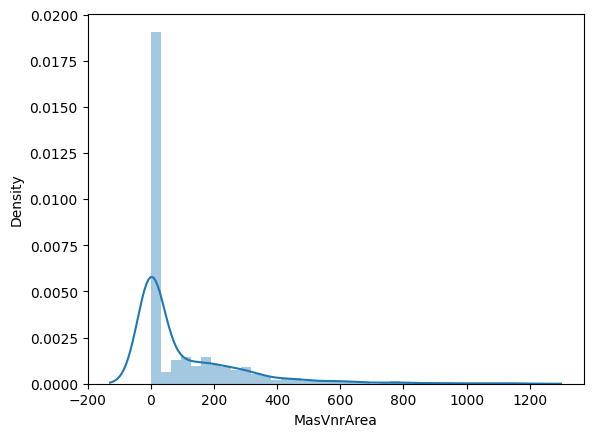

In [16]:
sns.distplot(train['MasVnrArea'])

#### 결측치를 가장 많은 0값으로 대체

In [17]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

### BsmtQual
#### 지하실 품질
#### train 결측치 : 1.9%

> TA: Typical (일반적인 품질) </br>
Gd: Good (좋은 품질) </br>
Ex: Excellent (탁월한 품질) </br>
Fa: Fair (보통 이하 품질)





In [18]:
train['BsmtQual'].isnull().sum() / train.shape[0]

0.019691780821917807

In [19]:
train['BsmtQual'].value_counts()

,count
BsmtQual,
TA,523
Gd,501
Ex,91
Fa,30


<Axes: xlabel='BsmtQual', ylabel='count'>

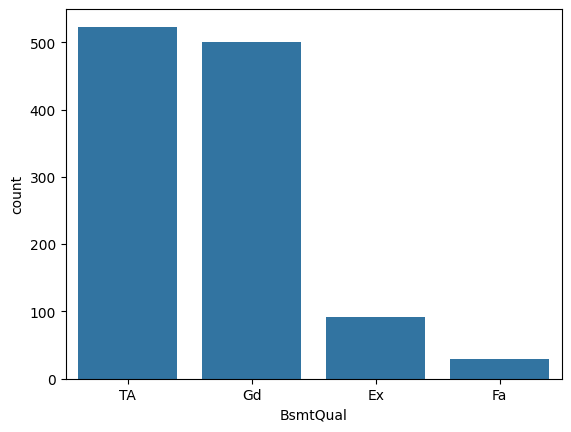

In [20]:
sns.countplot(data = train, x = 'BsmtQual')

#### 지하실 관련 Column들의 결측치가 같은 행에 분포 되어 있기에 전부 Drop

In [21]:
df_col = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df = train[df_col]
df[df['BsmtQual'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
37,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN
286,NaN,NaN,NaN,NaN,NaN
318,NaN,NaN,NaN,NaN,NaN
376,NaN,NaN,NaN,NaN,NaN
437,NaN,NaN,NaN,NaN,NaN
521,NaN,NaN,NaN,NaN,NaN
548,NaN,NaN,NaN,NaN,NaN


In [22]:
df_col = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df = test[df_col]
df[df['BsmtQual'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
12,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN
158,NaN,NaN,NaN,NaN,NaN
224,NaN,NaN,NaN,NaN,NaN


In [23]:
train_drop_index = train[train['BsmtQual'].isnull()].index

train.drop(train_drop_index, axis = 0, inplace = True)

In [24]:
train_na = train.isnull().sum().reset_index()

train_na.columns = ['Column', 'Count']
train_na = train_na[train_na['Count'] > 0]
train_na['rating'] = train_na['Count'] / train.shape[0]
train_na

,Column,Count,rating
28,BsmtExposure,1,0.000873
31,BsmtFinType2,1,0.000873
38,Electrical,1,0.000873
53,GarageType,64,0.055895
54,GarageYrBlt,64,0.055895
55,GarageFinish,64,0.055895
58,GarageQual,64,0.055895
59,GarageCond,64,0.055895


#### 추가로 1개씩 남은 BsmtExposure, BsmtFinType2의 경우도 Drop


In [25]:
drop_index = train[train['BsmtExposure'].isnull()].index
drop_index1 = train[train['BsmtFinType2'].isnull()].index

train = train.drop(drop_index, axis=0)
train = train.drop(drop_index1, axis=0)

In [26]:
train_na = train.isnull().sum().reset_index()

train_na.columns = ['Column', 'Count']
train_na = train_na[train_na['Count'] > 0]
train_na['rating'] = train_na['Count'] / train.shape[0]
train_na

,Column,Count,rating
38,Electrical,1,0.000875
53,GarageType,64,0.055993
54,GarageYrBlt,64,0.055993
55,GarageFinish,64,0.055993
58,GarageQual,64,0.055993
59,GarageCond,64,0.055993


### Electrical
#### train 결측치 : 0.08%

In [27]:
print(train['Electrical'].isnull().sum() / train.shape[0])

0.0008748906386701663


In [28]:
train['Electrical'].value_counts()

,count
Electrical,
SBrkr,1047
FuseA,73
FuseF,19
FuseP,2
Mix,1


#### 결측치를 가장 많은 SBrkr로 대체

In [29]:
train['Electrical'] = train['Electrical'].fillna('SBrkr')

In [30]:
train_na = train.isnull().sum().reset_index()

train_na.columns = ['Column', 'Count']
train_na = train_na[train_na['Count'] > 0]
train_na['rating'] = train_na['Count'] / train.shape[0]
train_na

,Column,Count,rating
53,GarageType,64,0.055993
54,GarageYrBlt,64,0.055993
55,GarageFinish,64,0.055993
58,GarageQual,64,0.055993
59,GarageCond,64,0.055993


### GarageType
#### 차고 위치
#### train 결측치 : 5.5%

In [31]:
print(train['GarageType'].isnull().sum() / train.shape[0])

0.05599300087489064


In [32]:
train['GarageType'].value_counts()

,count
GarageType,
Attchd,683
Detchd,299
BuiltIn,71
Basment,16
CarPort,7
2Types,3


<Axes: xlabel='GarageType', ylabel='count'>

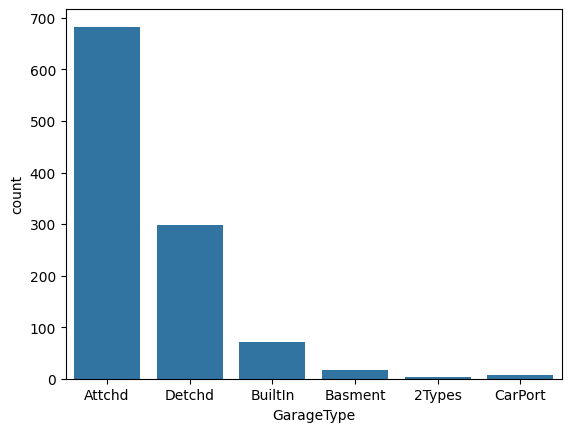

In [33]:
sns.countplot(data = train, x = train['GarageType'])

#### 차고 관련 Column들의 결측치가 같은 행에 분포 되어 있기에 전부 Drop

In [34]:
df_col = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
df = train[df_col]
df[df['GarageType'].isnull()]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
1,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1018,NaN,NaN,NaN,NaN,NaN
1069,NaN,NaN,NaN,NaN,NaN
1074,NaN,NaN,NaN,NaN,NaN
1124,NaN,NaN,NaN,NaN,NaN


In [35]:
train_drop_index = train[train['GarageType'].isnull()].index


train.drop(train_drop_index, axis = 0, inplace = True)

##### 남은 결측치가 없는 것으로 확인

In [36]:
train_na = train.isnull().sum().reset_index()

train_na.columns = ['Column', 'Count']
train_na = train_na[train_na['Count'] > 0]
train_na['rating'] = train_na['Count'] / train.shape[0]
train_na

,Column,Count,rating


## Featuer Engineering

### 숫자형 변수
#### skew 함수를 이용하여 그래프의 비대칭 정도를 볼 수 있음 (일반적으로 1 이상이면 비대칭이라고 봄)
#### 1 이상의 값이 나오면 정규 분포를 따르기 위한 log화 진행

In [37]:
from scipy.stats import skew

features_index = train.dtypes[train.dtypes != 'object'].index
skew_features = train[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
skew_features_top.sort_values(ascending = False)

,0
MiscVal,22.335194
PoolArea,13.810734
LowQualFinSF,11.120820
LotArea,10.878150
3SsnPorch,10.601507
KitchenAbvGr,5.730991
BsmtFinSF2,4.422659
BsmtHalfBath,3.891766
ScreenPorch,3.794330
EnclosedPorch,3.167771


In [38]:
train[skew_features_top.index] = np.log1p(train[skew_features_top.index])

### SalePrice
#### 회귀 모델에 적용하기 위한 log화(정규 분포 형태가 좋음)
#### 이때 평가를 위한 원본 데이터 추출 해야함

<ipython-input-39-545dc4fa9f3e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

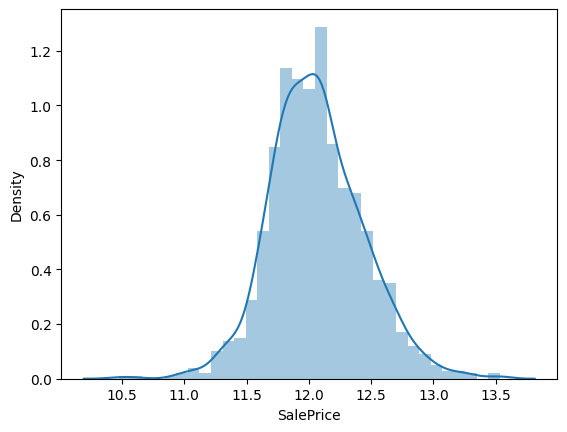

In [39]:
sns.distplot(train['SalePrice'])

In [40]:
SalePrice_df = train['SalePrice']
train['SalePrice'] = np.log1p(train['SalePrice'])

<ipython-input-41-545dc4fa9f3e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

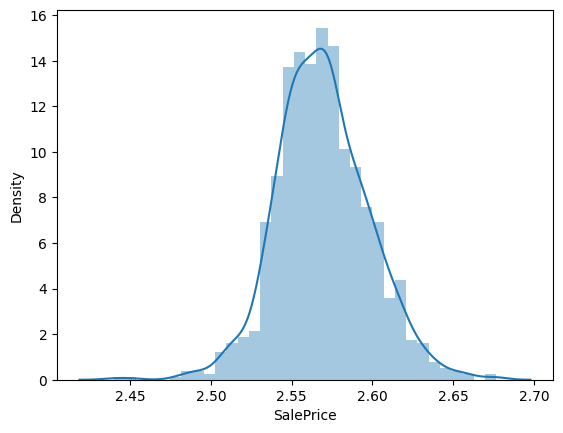

In [41]:
sns.distplot(train['SalePrice'])

### object형 변수 ont-hot encoding

In [42]:
train_target = train['SalePrice']
train = train.drop('SalePrice', axis=1)

print('원핫인코딩 하기전 : ', train.shape, test.shape)

combine_df = pd.concat([train, test], axis=0)
combine_df = pd.get_dummies(combine_df)

train = combine_df.iloc[:len(train), :]
test = combine_df.iloc[len(train):, :]

train['SalePrice'] = train_target

print('원핫인코딩 한 후 : ', train.shape, test.shape)

원핫인코딩 하기전 :  (1079, 72) (292, 72)
원핫인코딩 한 후 :  (1079, 264) (292, 263)


<ipython-input-42-f04027bb08bf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SalePrice'] = train_target


## Modeling

### train, test 분리

In [43]:
from sklearn.model_selection import train_test_split

target_df = train['SalePrice']
train_df = train.drop('SalePrice', axis = 1, inplace = False)

print(train_df.shape, target_df.shape)

x_train, x_test, y_train, y_test = train_test_split(train_df, target_df, test_size = 0.2, random_state = 156)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1079, 263) (1079,)
(863, 263) (863,) (216, 263) (216,)


### RMSE 평가 함수

In [44]:
from sklearn.metrics import mean_squared_error

def rmse_eval(models):
    for model in models:
         model.fit(x_train, y_train)
         pred = model.predict(x_test)
         mse = mean_squared_error(y_test, pred)
         rmse = np.sqrt(mse)
         print(model.__class__.__name__, 'RMSE : ', np.round(rmse, 3))

### 1차 모델링
#### 사용 모델 (Linear Regression, Ridge, Lasso)
#### feature importance을 보기 위함

In [45]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso

lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

models = [lr_reg, ridge_reg, lasso_reg]
rmse_eval(models)

LinearRegression RMSE :  0.013
Ridge RMSE :  0.011
Lasso RMSE :  0.025


### feature importance 시각화

In [46]:
def get_top_bottom_coef(model):
    coef = pd.Series(model.coef_, index = train_df.columns)
    high = coef.sort_values(ascending = False).head(10)
    low = coef.sort_values(ascending = False).tail(10)
    return high, low

def visualizing(models):
    fig, axs = plt.subplots(figsize = (24, 10), nrows = 1, ncols = 3)
    for num, model in enumerate(models):
      coef_high, coef_low = get_top_bottom_coef(model)
      coef_df = pd.concat([coef_high, coef_low])
      axs[num].set_title(model.__class__.__name__)
      sns.barplot(x = coef_df.values, y = coef_df.index, ax = axs[num])

    plt.tight_layout()
    plt.show()

#### Lasso의 경우 앞선 2개의 차트와 다른 양상을 보여주고 있음
##### 데이터 분할을 train_test_split에서 cross_val_score로 변경하여 재학습


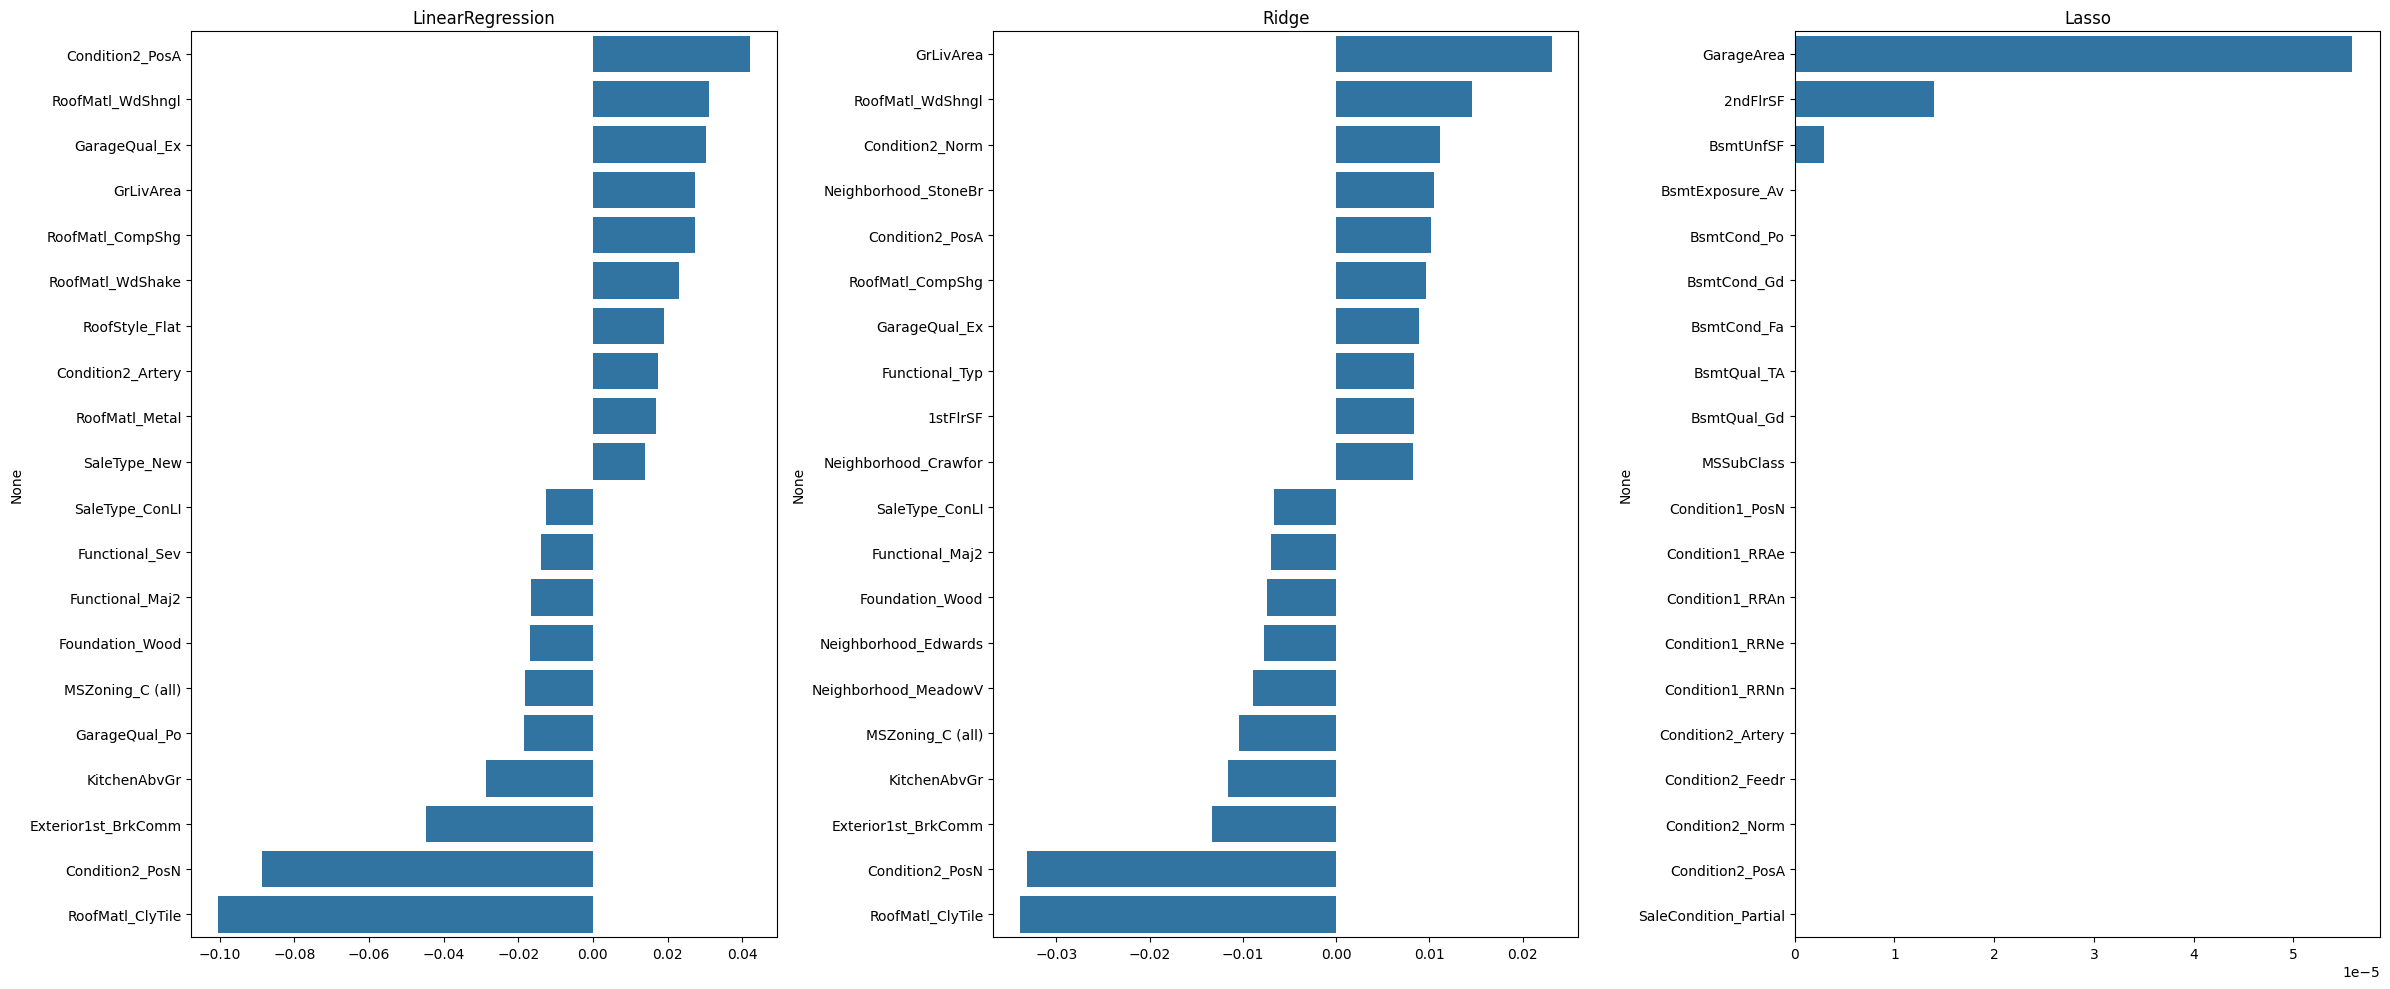

In [47]:
visualizing(models)

### Cross_val_Score

#### 전체 데이터를 5개의 폴드로 나누어 교차 검증 진행

In [48]:
from sklearn.model_selection import cross_val_score

def cross_eval(models):
    for model in models:
        rmse_score = np.sqrt(-cross_val_score(model, train_df, target_df, scoring = 'neg_mean_squared_error', cv = 5))
        rmse_avg = np.mean(rmse_score)
        print(model.__class__.__name__, 'RMSE : ', rmse_score)
        print(model.__class__.__name__, 'RMSE_mean : ', rmse_avg)
        print('\n')

#### RMSE의 수치가 줄어든 것을 볼 수 있음
##### LinearRegression RMSE :  0.013 > 0.01
##### Ridge RMSE :  0.011 >  0.01
##### Lasso RMSE :  0.025 > 0.022

In [49]:
lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

models = [lr_reg, ridge_reg, lasso_reg]
cross_eval(models)

LinearRegression RMSE :  [0.01472849 0.01182338 0.0081672  0.01005389 0.00795071]
LinearRegression RMSE_mean :  0.010544734035589986


Ridge RMSE :  [0.01332301 0.0115498  0.00794489 0.00963626 0.00792867]
Ridge RMSE_mean :  0.010076527695690129


Lasso RMSE :  [0.02269148 0.02457574 0.02140361 0.02311504 0.02059671]
Lasso RMSE_mean :  0.022476516830695886




In [50]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso

lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

models = [lr_reg, ridge_reg, lasso_reg]
rmse_eval(models)

LinearRegression RMSE :  0.013
Ridge RMSE :  0.011
Lasso RMSE :  0.025


### Ridge와 Lasso 하이퍼 파라미터 튜닝

In [51]:
from sklearn.model_selection import GridSearchCV

def best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(train_df, target_df)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [52]:
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = best_params(ridge_reg, ridge_params)
best_lasso = best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.0101, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.0123, 최적 alpha:{'alpha': 0.001}


### 2차 모델링

#### Lasso 모델의 스코어가 올라감
#### LinearRegression RMSE :  0.013 > 0.013
#### Ridge RMSE :  0.011 > 0.011
#### Lasso RMSE :  0.025 > 0.013

In [53]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha = 10)
lasso_reg = Lasso(alpha = 0.001)

models = [lr_reg, ridge_reg, lasso_reg]
rmse_eval(models)

LinearRegression RMSE :  0.013
Ridge RMSE :  0.011
Lasso RMSE :  0.013


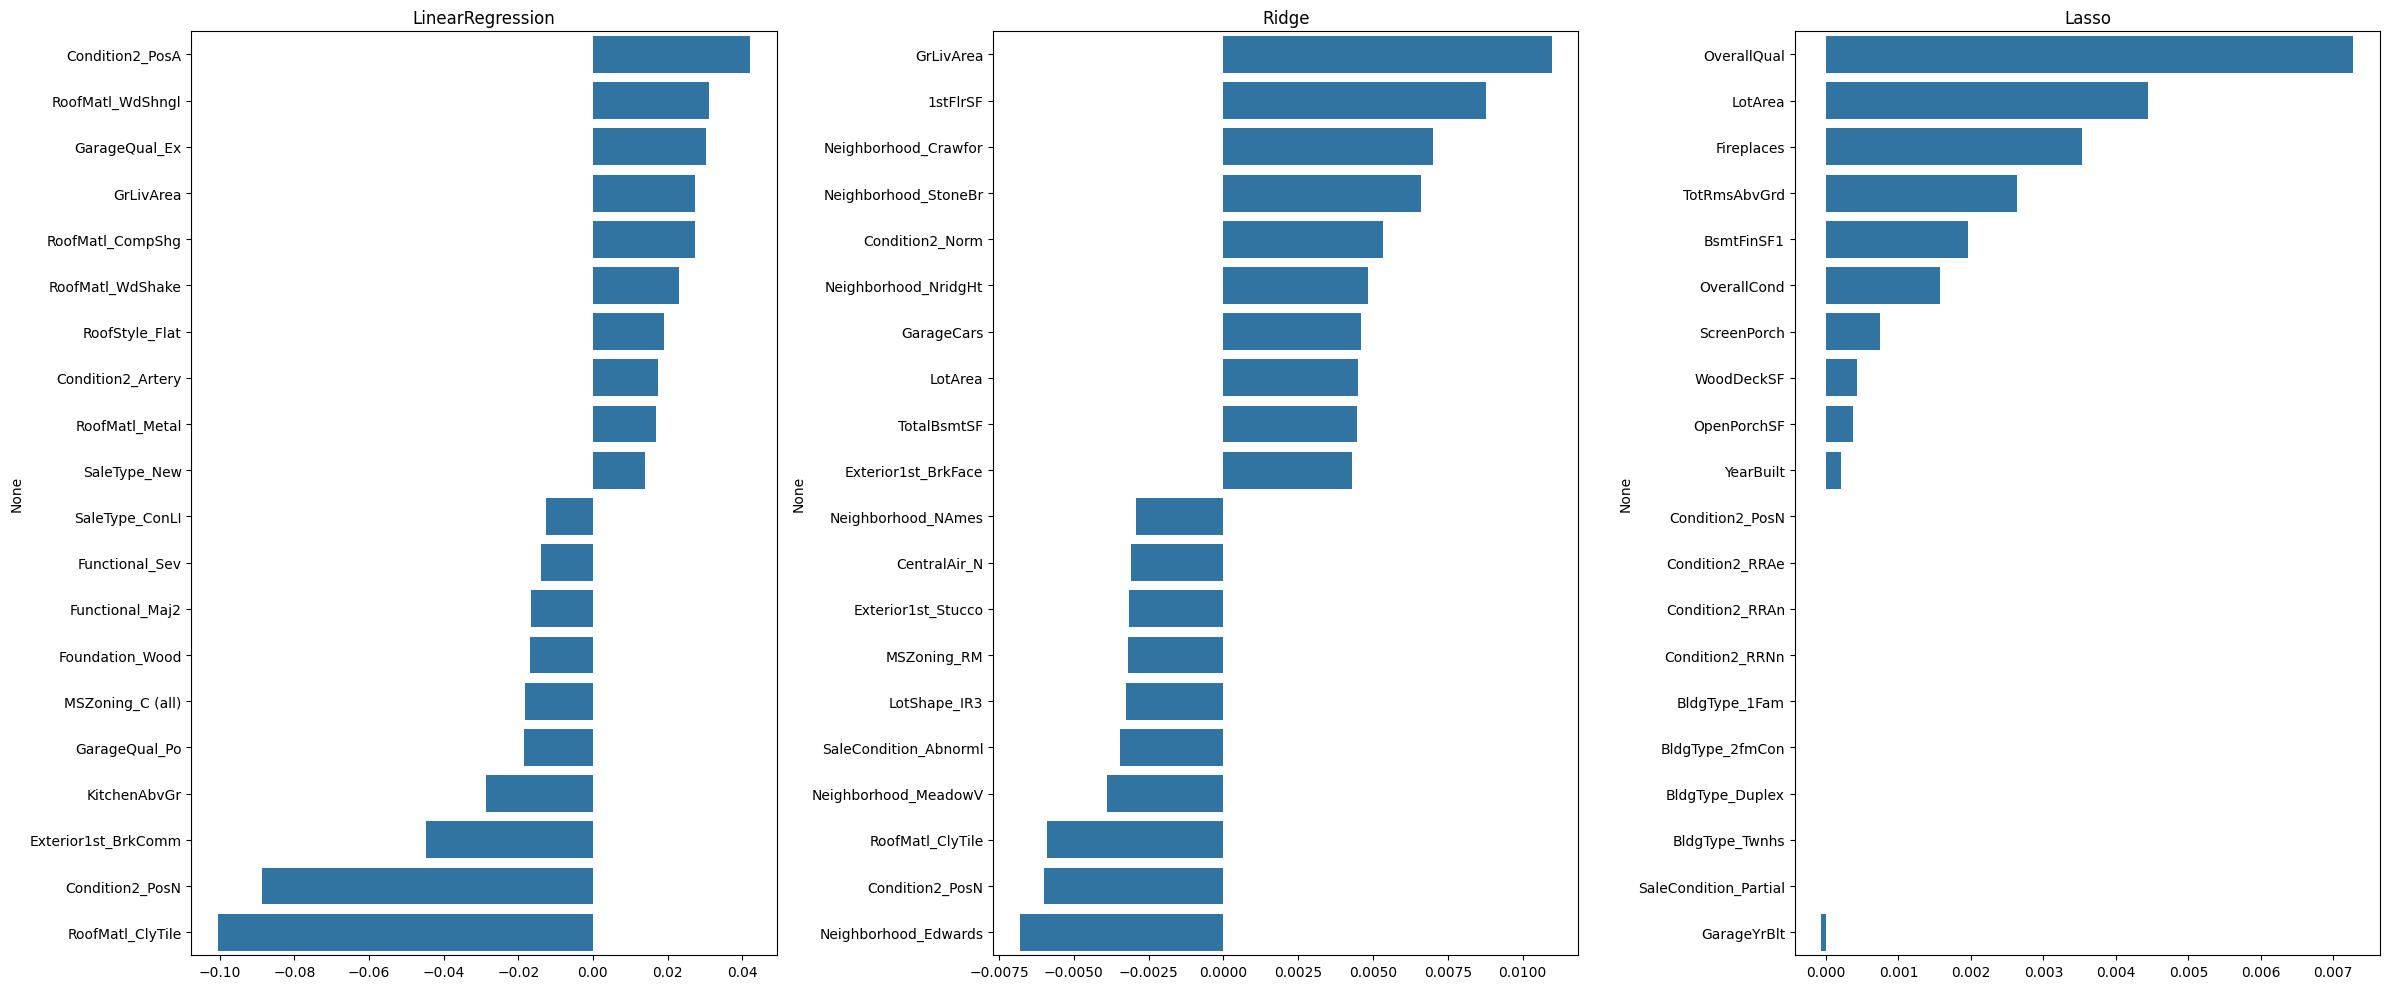

In [54]:
visualizing(models)

### 각 모델에서 영향을 많이 끼치는 변수들의 이상치 존재 여부 확인(원핫 인코딩 결과 제외)
##### GrLivArea
##### OverallQual

## 이상치
#### 따로 없는 것으로 보임

### GrLivArea

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

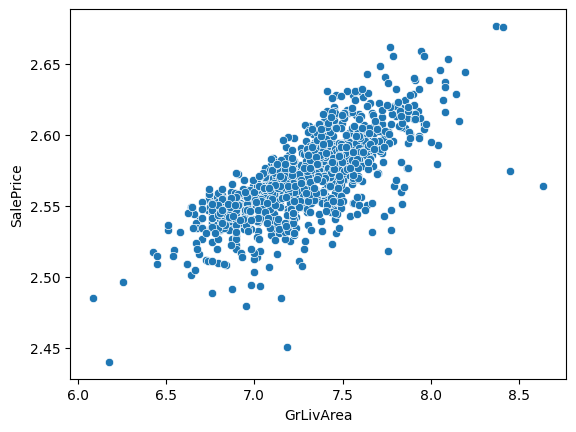

In [55]:
sns.scatterplot(x = train['GrLivArea'], y = train['SalePrice'])

### OverallQual

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

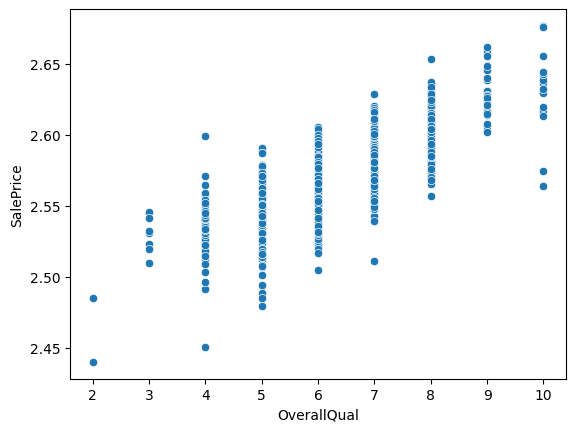

In [56]:
sns.scatterplot(x = train['OverallQual'], y = train['SalePrice'])

## Ridge 모델을 사용하여 결과 예측

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1079 entries, 0 to 1167
Columns: 264 entries, MSSubClass to SalePrice
dtypes: bool(228), float64(20), int64(16)
memory usage: 552.1 KB


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 291
Columns: 263 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(228), float64(19), int64(16)
memory usage: 147.1 KB


In [59]:
x_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

x_test = test.fillna(0)

model = Ridge(alpha = 10)
model.fit(x_train, y_train)
pred = model.predict(x_test)

test['id'] = test_id
submission = pd.DataFrame({'id': test['id'], 'SalePrice': pred})
submission.to_csv('submission.csv', index=False)

<ipython-input-59-a80eba3ac78b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['id'] = test_id


## 회고록
#### 이번 프로젝트는 대체적으로 스스로한테 아쉬운 점이 많았다.
#### test행의 수가 같아야 한다는 사실을 모른채 진행하다보니 시간적인 여유가 없어서 제출이라도 해보자라는 생각으로 진행 한 점
#### 시간이 다 지나고 보니 지하실 및 주차장 feature을 합쳐서 하나의 feature로 만들어서 진행 했으면 어땠을까라는 부분도 아쉬웠다.
#### 시간적 여유에 쫓기면서 진행하다보니 여러 모델의 결과를 토대로 데이터 셋을 만들고 최종 모델로 학습을 진행하는 스태킹 앙상블 기법도 사용을 못해본 것이 상당히 아쉬웠다.
#### 그리고 함수화를 시켰다면 셀 단위의 실행 시간이 감소 되었을텐데 하는 생각도 들었다.
#### 이번 프로젝트를 수행하며 확실하게 제출부분에 있어서 막히는 부분은 없을 거 같다.
#### 또한 앞서 문제가 있었던 부분을 교훈삼아서 진행 하면 더 나은 점수를 기대해볼 수도 있을 것이다.